In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from lbow.steadystate import MultiLayerModel

# Analytical solution of the flow over the Witch of Agnesi hill

This notebook shows how to calculate the semi-analytical solution of the uniform, stratified flow over a bell-shaped hill (also known as the Witch of Agnesi). The semi-analytical solution is obtained with LBoW, which solves linear theory of buoyancy waves.

Copyright 2022 Dries Allaerts

Licensed under the Apache License, Version 2.0.

## Set-up

### Input parameters

Flow parameters: wind speed U and Brunt Vaisala frequency N

In [3]:
U = [10,10,10]   # Wind speed [m/s]
N = [0,0.05,0.01] # Brunt-Vaisala frequency [1/s]
hi = [0,1000,1050]

Hill shape $h\left(x\right) = \large\frac{h_{max}}{1+\left(\frac{x}{L}\right)^2}$


In [4]:
L = 1000.0   # Characteristic width of the hill [m]
hmax = 100.0 # Height of the hill [m]

# Shape function of the hill
h = lambda x: hmax/(1+(x/L)**2)

Numerical parameters

In [5]:
Lx = 2000.0e3 # Length of the numerical domain [m]
Nx = int(1e5) # Number of grid points

Parameters for visualization

In [6]:
Lz = 15.0e3 # Height up to which solution is calculated [m]
Nz = 151    # Number of vertical levels to be used

### Numerical grid

In [7]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 20.0 m


In [8]:
zs,dz = np.linspace(0,Lz,Nz,retstep=True)
print('Vertical resolution is {} m'.format(dz))

Vertical resolution is 100.0 m


### Model

In [9]:
model = MultiLayerModel(xs,h(xs),U,N,hi)

## Solve flow problem

In [27]:
%time eta = model.solve('eta',zs)

CPU times: user 2.27 s, sys: 695 ms, total: 2.96 s
Wall time: 3.18 s


In [28]:
%time w = model.solve('w',zs)

CPU times: user 2.03 s, sys: 523 ms, total: 2.55 s
Wall time: 2.75 s


## Visualization

### Contourplots of vertical displacement $\eta$ and vertical velocity $w$

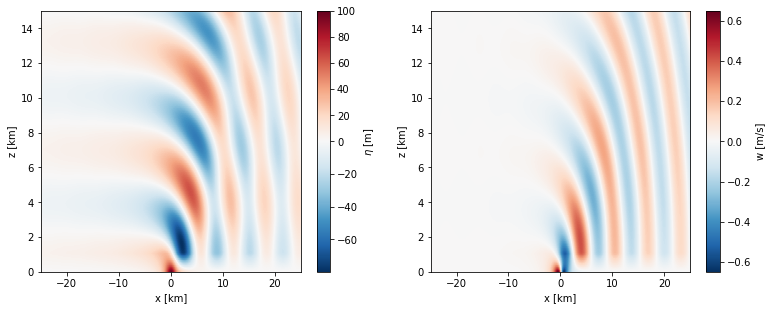

In [12]:
f,ax=plt.subplots(1,2,figsize=(12.8,4.8))

# Plot displacement in left axis
im=ax[0].imshow(eta.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.)
               )
cbar = f.colorbar(im,ax=ax[0],shrink=1.0,label=r'$\eta$ [m]')
_ = ax[0].set(xlim=[-25,25],ylim=[0,15],xlabel='x [km]',ylabel='z [km]')

# Plot vertical velocity in right axis
im=ax[1].imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))

# figure mark-up
cbar = f.colorbar(im,ax=ax[1],shrink=1.0,label='w [m/s]')
_ = ax[1].set(xlim=[-25,25],ylim=[0,15],xlabel='x [km]',ylabel='z [km]')

### Contourplot of vertical velocity $w$ overlaid with streamlines

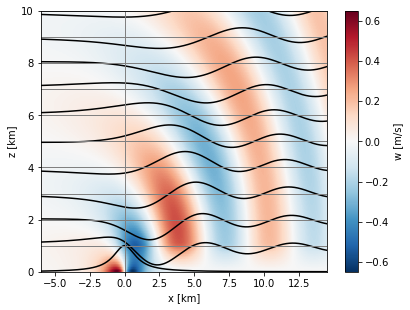

In [14]:
f,ax=plt.subplots(1,1,figsize=(6.4,4.8))

# background image showing vertical velocity contours
im=ax.imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))

# streamlines (vertical displacement scaled by a factor 10 for visibility)
for kz in range(0,Nz,10):
    ax.plot(xs/1e3,10*eta[:,kz]/1e3+zs[kz]/1e3,'k',linewidth=1.5)
    ax.axhline(zs[kz]/1e3,color='gray',linewidth=1)
ax.axvline(0,color='gray',linewidth=1)

# figure mark-up
cbar = f.colorbar(im,ax=ax,shrink=1.0,label='w [m/s]')
_ = ax.set(xlim=[-6,14.5],ylim=[0,10],xlabel='x [km]',ylabel='z [km]')